<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [2]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12055 non-null  int64  
 1   Administrative           12055 non-null  int64  
 2   Administrative_Duration  12055 non-null  float64
 3   Informational            12055 non-null  int64  
 4   Informational_Duration   12055 non-null  float64
 5   ProductRelated           12055 non-null  int64  
 6   ProductRelated_Duration  12055 non-null  float64
 7   BounceRates              12055 non-null  float64
 8   ExitRates                12055 non-null  float64
 9   PageValues               12055 non-null  float64
 10  SpecialDay               12055 non-null  float64
 11  Weekend                  12055 non-null  bool   
 12  Month                    12055 non-null  object 
 13  CustomerType             12054 non-null  object 
 14  Purchase              

The marketing team asked you to analyze the behavior of online customers during November and December, the busiest months for shoppers.

What are the purchase rates for online shopping sessions by customer type for November and December? Store the result in a dictionary called purchase_rates in the format below using the exact names for keys.

In [3]:
df_nov_dec = shopping_data[shopping_data['Month'].isin(['Nov','Dec'])]
df_nov_dec.shape

(4450, 15)

In [ ]:
# new customer purchase = purchase(1)/total
# returning customer = purchase(1)/total

In [4]:
Purchased_df = df_nov_dec.groupby(['CustomerType','Purchase'])['Purchase'].size().unstack(level = 1)
Purchased_df

Purchase,0.0,1.0
CustomerType,,
New_Customer,529,199
Returning_Customer,2994,728


In [5]:
Purchased_df['sum'] = Purchased_df[0.0] + Purchased_df[1.0]

Purchased_df['purchase_rate'] = Purchased_df[1]/Purchased_df['sum']
Purchased_df

Purchase,0.0,1.0,sum,purchase_rate
CustomerType,,,,
New_Customer,529,199,728,0.273352
Returning_Customer,2994,728,3722,0.195594


In [7]:
purchase_rate_new_cust = Purchased_df.loc['New_Customer','purchase_rate']
purchase_rate_returning_cust = Purchased_df.loc['Returning_Customer','purchase_rate']

In [8]:
purchase_rates= {'New_Customer': purchase_rate_new_cust,'Returning_Customer':purchase_rate_returning_cust}
purchase_rates

{'New_Customer': 0.2733516483516483, 'Returning_Customer': 0.1955937667920473}

What is the strongest correlation in total time spent among page types by returning customers in November and December? Store the result in a dictionary called top_correlation in the format below using the exact names for keys.

In [13]:
nov_dec_return_cust= df_nov_dec[ df_nov_dec['CustomerType'].isin(['Returning_Customer'])]

In [19]:
corr_mat = nov_dec_return_cust[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']].corr()
corr_copy = corr_mat.copy()

In [21]:
#Filling the dialgonal with np.nan as max corr is 1 so removing it will help getting the best corr
np.fill_diagonal(corr_copy.values,np.nan)

In [28]:

top_correlation = {"pair": (corr_copy.stack().idxmax()[0], corr_copy.stack().idxmax()[1]), "correlation": corr_copy.stack().max()}
top_correlation

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'),
 'correlation': 0.41689293883422823}

**A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? Store the result in a variable called prob_at_least_100_sales. Optional: plot a binomial probability distribution chart to visualize your chances.**

In [29]:
# We know that the current purchase rate for the returning customers is
print("Current purchase rate for the returning customer:", purchase_rate_returning_cust)

Current purchase rate for the returning customer: 0.1955937667920473


In [31]:
#15% increase would be
pr_15 = purchase_rate_returning_cust*1.15
print("Current purchase rate for the returning customer:",pr_15)

Current purchase rate for the returning customer: 0.22493283181085436


In [35]:
# First, we find the likelihood of having <100 sales of 500 sessions
# We can find this from binomial cdf
prob_sales_less_100 = stats.binom.cdf(k = 100,n=500,p = pr_15 )

print("probability of having <100 sales:", prob_sales_less_100)

probability of having <100 sales: 0.0987778660962733


In [37]:
# so the probabiility of having atleast 100 sales would be
prob_at_least_100_sales = 1 - prob_sales_less_100
print("probability of having at least 100 sales:", prob_at_least_100_sales)

probability of having at least 100 sales: 0.9012221339037267


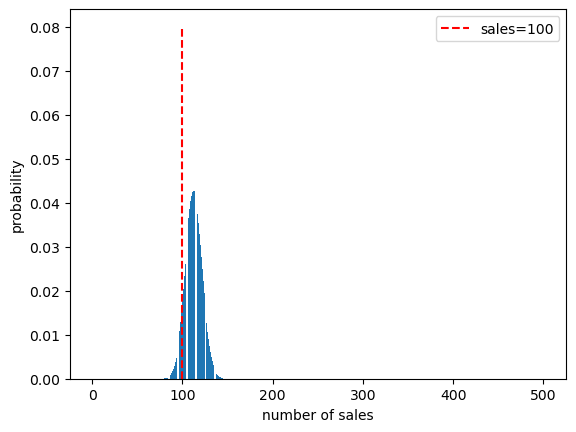

In [38]:
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, pr_15) for k in k_values ] 
plt.bar(k_values, p_binom_values) 
plt.vlines(100, 0, 0.08, color='r', linestyle='dashed', label="sales=100")
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()
